In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
os.listdir()

['..gitignore.un~',
 '.git',
 '.gitignore',
 '.gitignore.swp',
 '.gitignore.swp.swp',
 '.ipynb_checkpoints',
 '.venv',
 'Food Project.ipynb',
 'wfp_food_prices_egy.csv']

In [4]:
df = pd.read_csv("wfp_food_prices_egy.csv")

In [5]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2010-08-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Potatoes,KG,actual,Retail,EGP,1.81,0.3173
2,2010-08-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Rice,KG,actual,Retail,EGP,3.98,0.6981
3,2010-08-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Wheat flour,KG,actual,Retail,EGP,3.44,0.6035
4,2010-08-15,NaN,NaN,National Average,NaN,NaN,"meat, fish and eggs",Meat (beef),KG,actual,Retail,EGP,50.22,8.8105


In [7]:
df = df.drop(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 1 to 2715
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       2715 non-null   object
 1   admin1     590 non-null    object
 2   admin2     590 non-null    object
 3   market     2715 non-null   object
 4   latitude   590 non-null    object
 5   longitude  590 non-null    object
 6   category   2715 non-null   object
 7   commodity  2715 non-null   object
 8   unit       2715 non-null   object
 9   priceflag  2715 non-null   object
 10  pricetype  2715 non-null   object
 11  currency   2715 non-null   object
 12  price      2715 non-null   object
 13  usdprice   2715 non-null   object
dtypes: object(14)
memory usage: 297.1+ KB


In [11]:
df['date'] = pd.to_datetime(df['date'])
df['price'] = df['price'].astype(float)
df['usdprice'] = df['usdprice'].astype(float)

In [12]:
df["Exchange Rate"] = df["price"]/df["usdprice"]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 1 to 2715
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2715 non-null   datetime64[ns]
 1   admin1         590 non-null    object        
 2   admin2         590 non-null    object        
 3   market         2715 non-null   object        
 4   latitude       590 non-null    object        
 5   longitude      590 non-null    object        
 6   category       2715 non-null   object        
 7   commodity      2715 non-null   object        
 8   unit           2715 non-null   object        
 9   priceflag      2715 non-null   object        
 10  pricetype      2715 non-null   object        
 11  currency       2715 non-null   object        
 12  price          2715 non-null   float64       
 13  usdprice       2715 non-null   float64       
 14  Exchange Rate  2715 non-null   float64       
dtypes: datetime64[ns](1),

In [14]:
df2 = df[["date","commodity","price","usdprice","Exchange Rate"]]

In [15]:
df2

,date,commodity,price,usdprice,Exchange Rate
1,2010-08-15,Potatoes,1.81,0.3173,5.704381
2,2010-08-15,Rice,3.98,0.6981,5.701189
3,2010-08-15,Wheat flour,3.44,0.6035,5.700083
4,2010-08-15,Meat (beef),50.22,8.8105,5.700017
5,2010-08-15,"Meat (chicken, frozen)",17.00,2.9822,5.700490
...,...,...,...,...,...
2711,2024-10-15,Oil (cotton),55.52,1.1447,48.501791
2712,2024-10-15,"Beans (fava, dry)",46.51,0.9590,48.498436
2713,2024-10-15,Lentils,61.65,1.2711,48.501298
2714,2024-10-15,Cucumbers (medium sized),19.47,0.4014,48.505232


In [16]:
df2.commodity.unique()

array(['Potatoes', 'Rice', 'Wheat flour', 'Meat (beef)',
       'Meat (chicken, frozen)', 'Sugar', 'Ghee (artificial)',
       'Ghee (natural)', 'Oil (maize)', 'Beans (fava, dry)', 'Garlic',
       'Tomatoes', 'Onions (red)', 'Onions (white)', 'Pasta', 'Lentils',
       'Eggs', 'Oil (sunflower)', 'Fish (tilapia)',
       'Meat (beef, without bones)', 'Cheese', 'Cheese (picon)', 'Milk',
       'Oil (mixed)', 'Wheat flour (unpacked, 72%)', 'Eggs (medium size)',
       'Meat (chicken, farm)', 'Cheese (local, processed, Nesto)',
       'Milk (fresh)', 'Oil (cotton)', 'Cucumbers (medium sized)'],
      dtype=object)

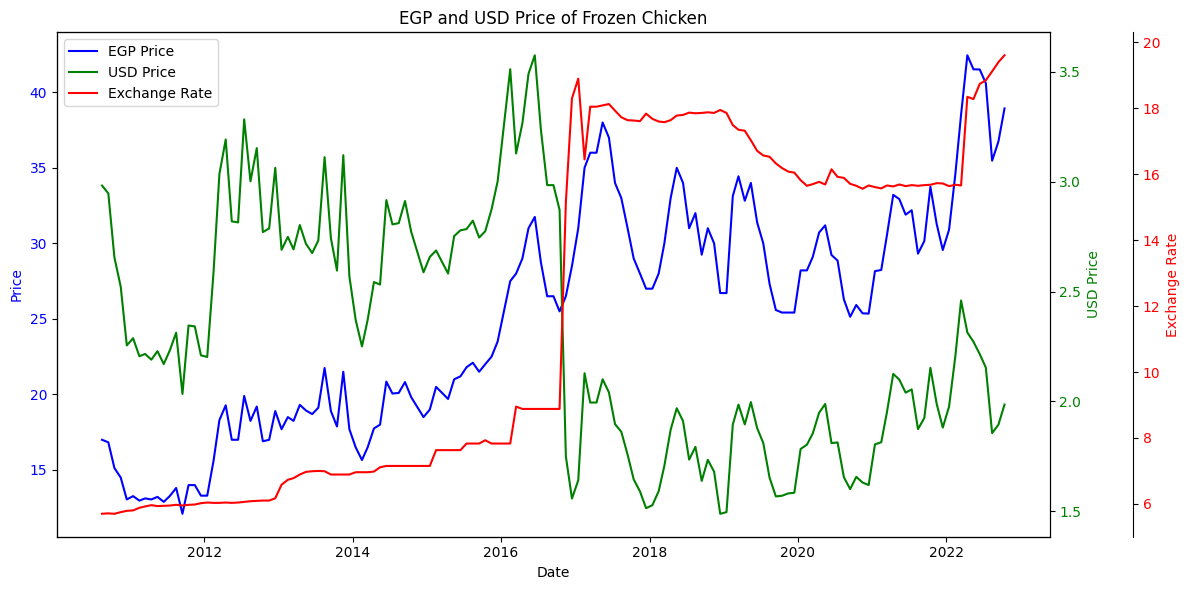

In [33]:
frozen_chicken = df2.query("commodity == 'Meat (chicken, frozen)'")

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot price on the first axis
sns.lineplot(x='date', y='price', data=frozen_chicken, ax=ax1, color='blue', label='EGP Price')
ax1.set_ylabel('Price', color='blue')
ax1.set_xlabel('Date')
ax1.tick_params(axis='y', labelcolor='blue')

# usdprice
ax2 = ax1.twinx()
sns.lineplot(x='date', y='usdprice', data=frozen_chicken, ax=ax2, color='green', label='USD Price')
ax2.set_ylabel('USD Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# exchange rate
ax3 = ax1.twinx()
# Move the third axis to the right
ax3.spines['right'].set_position(('outward', 60))
sns.lineplot(x='date', y='Exchange Rate', data=frozen_chicken, ax=ax3, color='red', label='Exchange Rate')
ax3.set_ylabel('Exchange Rate', color='red')
ax3.tick_params(axis='y', labelcolor='red')

# Position the legend at the top-right corner and ensure all labels are in one legend
# The `handles` and `labels` arguments will combine the labels from all axes into one legend

# Turn off individual legends to avoid duplicates
ax1.legend_.remove()  # Remove ax1 legend
ax2.legend_.remove()  # Remove ax2 legend
ax3.legend_.remove()  # Remove ax3 legend

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()

# Combine all handles and labels into a single list
handles.extend(handles2)
labels.extend(labels2)
handles.extend(handles3)
labels.extend(labels3)

# Place the legend in the top-right corner
plt.legend(handles=handles, labels=labels, loc='upper left')

# Display the plot
plt.title('EGP and USD Price of Frozen Chicken')
plt.tight_layout()  # To ensure no clipping
plt.show()

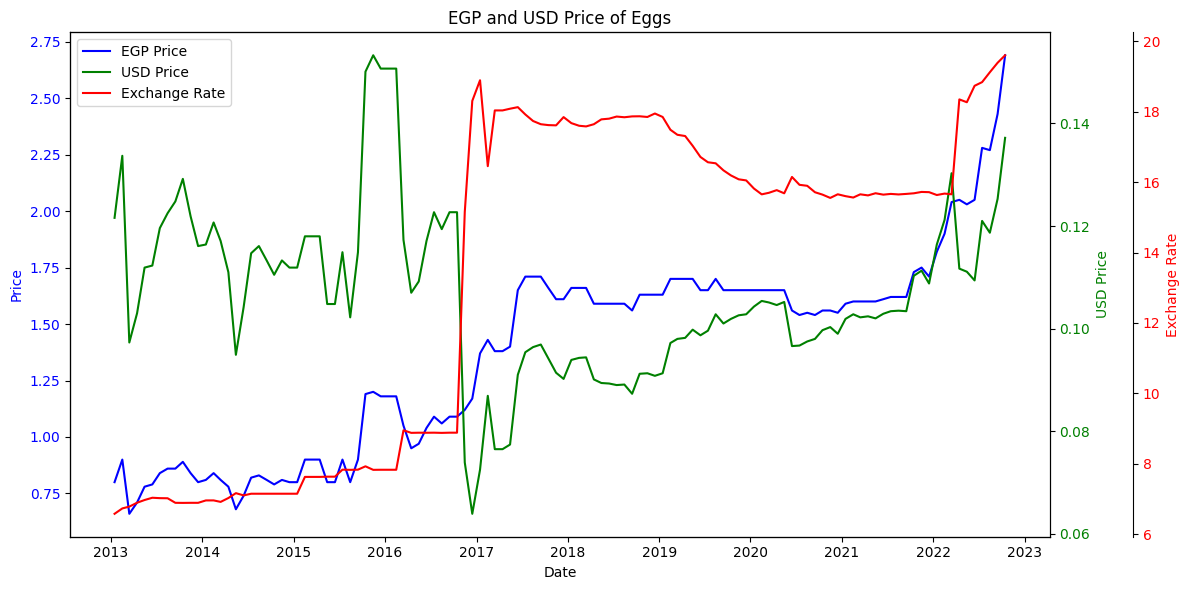

In [34]:
eggs = df2.query("commodity == 'Eggs'")

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot price on the first axis
sns.lineplot(x='date', y='price', data=eggs, ax=ax1, color='blue', label='EGP Price')
ax1.set_ylabel('Price', color='blue')
ax1.set_xlabel('Date')
ax1.tick_params(axis='y', labelcolor='blue')

# usdprice
ax2 = ax1.twinx()
sns.lineplot(x='date', y='usdprice', data=eggs, ax=ax2, color='green', label='USD Price')
ax2.set_ylabel('USD Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# exchange rate
ax3 = ax1.twinx()
# Move the third axis to the right
ax3.spines['right'].set_position(('outward', 60))
sns.lineplot(x='date', y='Exchange Rate', data=eggs, ax=ax3, color='red', label='Exchange Rate')
ax3.set_ylabel('Exchange Rate', color='red')
ax3.tick_params(axis='y', labelcolor='red')

# Position the legend at the top-right corner and ensure all labels are in one legend
# The `handles` and `labels` arguments will combine the labels from all axes into one legend

# Turn off individual legends to avoid duplicates
ax1.legend_.remove()  # Remove ax1 legend
ax2.legend_.remove()  # Remove ax2 legend
ax3.legend_.remove()  # Remove ax3 legend

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()

# Combine all handles and labels into a single list
handles.extend(handles2)
labels.extend(labels2)
handles.extend(handles3)
labels.extend(labels3)

# Place the legend in the top-right corner
plt.legend(handles=handles, labels=labels, loc='upper left')

# Display the plot
plt.title('EGP and USD Price of Eggs')
plt.tight_layout()  # To ensure no clipping
plt.show()

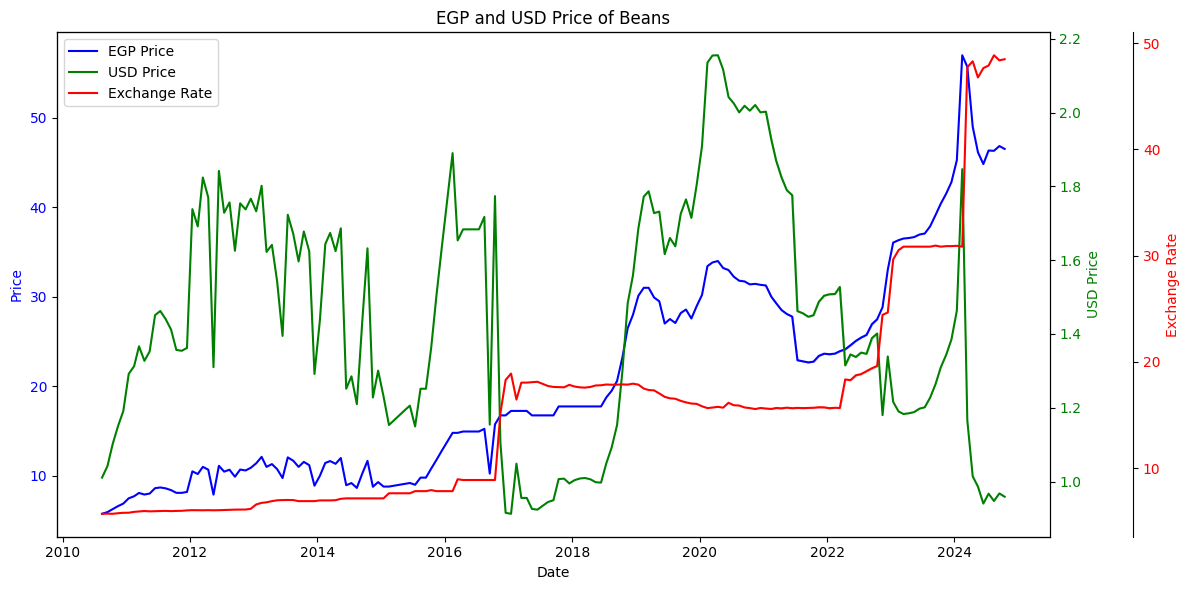

In [36]:
beans = df2.query("commodity == 'Beans (fava, dry)'")

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot price on the first axis
sns.lineplot(x='date', y='price', data=beans, ax=ax1, color='blue', label='EGP Price')
ax1.set_ylabel('Price', color='blue')
ax1.set_xlabel('Date')
ax1.tick_params(axis='y', labelcolor='blue')

# usdprice
ax2 = ax1.twinx()
sns.lineplot(x='date', y='usdprice', data=beans, ax=ax2, color='green', label='USD Price')
ax2.set_ylabel('USD Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# exchange rate
ax3 = ax1.twinx()
# Move the third axis to the right
ax3.spines['right'].set_position(('outward', 60))
sns.lineplot(x='date', y='Exchange Rate', data=beans, ax=ax3, color='red', label='Exchange Rate')
ax3.set_ylabel('Exchange Rate', color='red')
ax3.tick_params(axis='y', labelcolor='red')

# Position the legend at the top-right corner and ensure all labels are in one legend
# The `handles` and `labels` arguments will combine the labels from all axes into one legend

# Turn off individual legends to avoid duplicates
ax1.legend_.remove()  # Remove ax1 legend
ax2.legend_.remove()  # Remove ax2 legend
ax3.legend_.remove()  # Remove ax3 legend

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()

# Combine all handles and labels into a single list
handles.extend(handles2)
labels.extend(labels2)
handles.extend(handles3)
labels.extend(labels3)

# Place the legend in the top-right corner
plt.legend(handles=handles, labels=labels, loc='upper left')

# Display the plot
plt.title('EGP and USD Price of Beans')
plt.tight_layout()  # To ensure no clipping
plt.show()